**Handwritten digit classification [MNIST dataset] from scratch**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

*Loading data*

In [2]:
trainY = "data/train-labels.idx1-ubyte"
trainX = "data/train-images.idx3-ubyte"
testY = "data/t10k-labels.idx1-ubyte"
testX = "data/t10k-images.idx3-ubyte"

*Convert images in ubyte format into csv*

In [3]:
def convert_ubyteToCSV(imgs, labels, outfile, n):
    imgf = open(imgs,"rb")
    labelf = open(labels,"rb")
    csvf = open(outfile,"w")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))]
        for j in range(28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image )+ "\n")
    imgf.close()
    labelf.close()
    csvf.close()

In [4]:
convert_ubyteToCSV(trainX, trainY, "data/train.csv",60000)
convert_ubyteToCSV(testX, testY, "data/test.csv",10000)

In [5]:
df = pd.read_csv("data/train.csv", header=None)
print(df.shape)

(60000, 785)


In [6]:
train_file = open("data/train.csv", "r")
train_list = train_file.readlines()
train_file.close()

train_list[12345]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,46,136,236,254,254,255,254,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,103,217,253,253,253,253,253,253,253,228,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,212,253,253,253,253,253,253,253,253,253,253,150,8,0,0,0,0,0,0,0,0,0,0,0,0,0,25,203,253,253,253,253,253,253,222,185,253,253,253,253,35,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,253,253,253,253,253,220,37,3,61,223,253,253,76,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,253,253,253,253,171,37,0,0,0,166,253,253,104,0,0,0,0,0,0,0,0,0,0,0,0,0,4,165,247,236,129,47,3,0,0,0,1,168,253,253,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,107,253,253,253,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,162,253,253,253,182,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,60,159,247

In [7]:
test_file = open("data/test.csv", "r")
test_list = test_file.readlines()
test_file.close()


*Building the Machine learning model from scratch*

In [8]:
class NeuralNetwork:
    def __init__(self, sizes, epoch, lr):
        self.sizes = sizes
        self.epoch = epoch
        self.lr = lr
        input_layer = sizes[0]
        hidden_layer1 = sizes[1]
        hidden_layer2 = sizes[2]
        output_layer = sizes[3]

        self.parameters = {

            "w1" : np.random.randn(128, 784) * np.sqrt(1./128),
            "b1" : np.zeros((128, 1)),

            "w2" : np.random.randn(64, 128) * np.sqrt(1./64),
            "b2" : np.zeros((64, 1)),

            "w3" : np.random.randn(10, 64) * np.sqrt(1./10),
            "b3" : np.zeros((10, 1)),

        }


    def relu(self, x):
        return np.maximum(0, x)

    def softMax(self, x):
        exps = np.exp(x-np.max(x, axis = 0, keepdims=True))
        return exps / np.sum(exps, axis = 0, keepdims=True)

    def forward_pass(self, x_train):
        parameters = self.parameters
        parameters['A0'] = x_train

        # input to hidden_1
        parameters['Z1'] = np.dot(parameters['w1'],parameters['A0'])+parameters['b1']
        parameters['A1'] = self.relu(parameters['Z1'])

        # input to hidden_2
        parameters['Z2'] = np.dot(parameters['w2'],parameters['A1'])+parameters['b2']
        parameters['A2'] = self.relu(parameters['Z2'])

        # input to hidden_3
        parameters['Z3'] = np.dot(parameters['w3'],parameters['A2'])+parameters['b3']
        parameters['A3'] = self.softMax(parameters['Z3'])

        return parameters['A3']

    def compute_loss(self, Y_true, Y_pred):
        m = Y_true.shape[1]
        loss = -np.sum(Y_true * np.log(Y_pred + 1e-8))/m
        return loss

    def backward_pass(self, y_true):
        p = self.parameters
        m = y_true.shape[1]

        #output layer
        dZ3 = p['A3'] - y_true
        dW3 = (1/m) * np.dot(dZ3, p['A2'].T)
        db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)

        # hidden layer 2
        dA2 = np.dot(p['w3'].T, dZ3)
        dZ2 = dA2 * (p['A2'] > 0)
        dW2 = (1/m) * np.dot(dZ2, p['A1'].T)
        db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)

        #hidden layer 1
        dA1 = np.dot(p['w2'].T, dZ2)
        dZ1 = dA1 * (p['A1'] > 0)
        dW1 = (1/m) * np.dot(dZ1, p['A0'].T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims = True)

        self.parameters['w3'] -= self.lr * dW3
        self.parameters['b3'] -= self.lr * db3
        self.parameters['w2'] -= self.lr * dW2
        self.parameters['b2'] -= self.lr * db2
        self.parameters['w1'] -= self.lr * dW1
        self.parameters['b1'] -= self.lr * db1

    def train(self, x, y, batch_size=64):
        m = x.shape[1]
        for i in range(self.epoch):
            #shuffle
            perm = np.random.permutation(m)
            x_shuffled = x[:, perm]
            y_shuffled = y[:, perm]

            for k in range(0, m, batch_size):
                end = k + batch_size
                xb = x_shuffled[:, k:end]
                yb = y_shuffled[:, k:end]

                y_pred = self.forward_pass(xb)
                loss = self.compute_loss(yb, y_pred)
                self.backward_pass(yb)

            if i % 10 == 0:
                print(f"Epoch {i+1}/{self.epoch}, Loss: {loss:.4f}")

    def predict(self, x):
        Y_pred = self.forward_pass(x)
        return np.argmax(Y_pred, axis = 0)

    def accuracy(self, x, y_labels):
        y_pred = self.predict(x)
        return np.mean(y_pred == y_labels)*100

In [9]:
train = pd.read_csv("data/train.csv", header=None)
test = pd.read_csv("data/test.csv", header=None)

x_train = train.iloc[:, 1:].values.T/ 255.0
Y_train_labels = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values.T/ 255.0
Y_test_labels = test.iloc[:, 0].values

def one_hot(y, num_classes = 10):
    one_hot_y = np.zeros((num_classes, y.size))
    one_hot_y[y, np.arange(y.size)] = 1
    return one_hot_y

Y_train = one_hot(Y_train_labels)

In [10]:
dnn = NeuralNetwork(sizes = [784,128, 64, 10], epoch=100, lr=0.1)
dnn.train(x_train, Y_train, batch_size=64)

print("Train accuracy:", dnn.accuracy(x_train, Y_train_labels))
print("Test accuracy:", dnn.accuracy(X_test, Y_test_labels))


Epoch 1/100, Loss: 0.0538
Epoch 11/100, Loss: 0.0027
Epoch 21/100, Loss: 0.0037
Epoch 31/100, Loss: 0.0021
Epoch 41/100, Loss: 0.0005
Epoch 51/100, Loss: 0.0006
Epoch 61/100, Loss: 0.0005
Epoch 71/100, Loss: 0.0000
Epoch 81/100, Loss: 0.0005
Epoch 91/100, Loss: 0.0003
Train accuracy: 100.0
Test accuracy: 98.0


*Displaying an example from the train set*

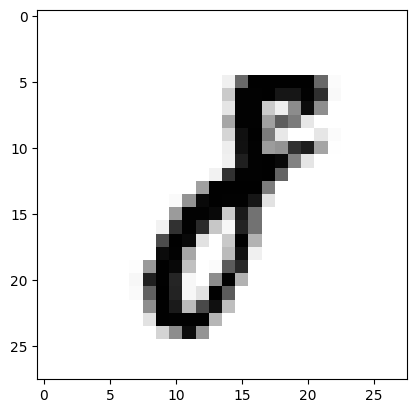

In [11]:
values = train_list[3425].split(",")
image_array = np.asarray(values[1:],dtype=int).reshape((28,28))
plt.imshow(image_array, cmap="Greys")

In [12]:
line = train_list[3425].strip().split(",")

pixels = np.array(line[1:], dtype=np.float32).reshape(784,1) / 255.0

prediction = dnn.predict(pixels)[0]

print("True label:", line[0])
print("Predicted label:", prediction)

True label: 8
Predicted label: 8


*Generate a canvas and draw your own digit to test the model*

In [13]:
import tkinter as tk
from PIL import Image, ImageDraw

def open_digit_canvas():
    """
    Opens a drawing canvas for the user to draw a digit.
    Saves the drawing as a 28x28 pixel image when done.
    """
    # Constants
    CANVAS_SIZE = 280  # 10x the MNIST size for better drawing experience
    MNIST_SIZE = 28

    # Create the main window
    root = tk.Tk()
    root.title("Draw a digit from 1 to 9")
    root.configure(bg='black')

    # Create a frame to hold the canvas and buttons
    frame = tk.Frame(root, bg='black')
    frame.pack(padx=10, pady=10)

    # Create a label with instructions
    label = tk.Label(frame, text="Draw a digit from 1 to 9", fg="white", bg="black", font=("Arial", 16))
    label.pack(pady=5)

    # Create the canvas
    canvas = tk.Canvas(frame, width=CANVAS_SIZE, height=CANVAS_SIZE, bg='black', highlightbackground='white')
    canvas.pack(pady=5)

    # Variables to track drawing
    drawing = False
    last_x, last_y = 0, 0

    # Create an in-memory image to store the drawing
    image = Image.new("L", (CANVAS_SIZE, CANVAS_SIZE), 0)  # "L" mode for grayscale, black background
    draw = ImageDraw.Draw(image)

    # Drawing functions
    def start_drawing(event):
        nonlocal drawing, last_x, last_y
        drawing = True
        last_x, last_y = event.x, event.y

    def draw_line(event):
        nonlocal drawing, last_x, last_y
        if drawing:
            x, y = event.x, event.y
            # Draw on canvas
            canvas.create_line(last_x, last_y, x, y, fill='white', width=15, capstyle=tk.ROUND, smooth=True)
            # Draw on image
            draw.line([last_x, last_y, x, y], fill=255, width=15)
            last_x, last_y = x, y

    def stop_drawing(event):
        nonlocal drawing
        drawing = False

    def clear_canvas():
        canvas.delete("all")
        # Clear the image
        draw.rectangle([0, 0, CANVAS_SIZE, CANVAS_SIZE], fill=0)

    def save_and_close():
        # Resize the image to 28x28 pixels
        resized_image = image.resize((MNIST_SIZE, MNIST_SIZE), Image.LANCZOS)
        # Save the image
        resized_image.save("drawn_digit.png")
        # Close the window
        root.destroy()

    # Bind mouse events to canvas
    canvas.bind("<Button-1>", start_drawing)
    canvas.bind("<B1-Motion>", draw_line)
    canvas.bind("<ButtonRelease-1>", stop_drawing)

    # Create buttons
    button_frame = tk.Frame(frame, bg='black')
    button_frame.pack(pady=10)

    clear_button = tk.Button(button_frame, text="Clear", command=clear_canvas, bg='gray', fg='white')
    clear_button.pack(side=tk.LEFT, padx=5)

    done_button = tk.Button(button_frame, text="Done", command=save_and_close, bg='green', fg='white')
    done_button.pack(side=tk.LEFT, padx=5)

    # Start the main loop
    root.mainloop()


*Process the drawn digit*

In [18]:
# Load and process the drawn digit
def process_drawn_digit():
    # Load the drawn digit image
    drawn_image = Image.open("drawn_digit.png")

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.imshow(drawn_image, cmap='Greys')
    plt.title("Your drawn digit")
    plt.axis('off')
    plt.show()

    # Convert to numpy array and normalize
    img_array = np.array(drawn_image).reshape(784, 1) / 255.0

    # Make prediction
    predicted_digit = dnn.predict(img_array)[0]

    print(f"Predicted digit: {predicted_digit}")

    return predicted_digit

# Example usage:
# 1. First run: open_digit_canvas()
# 2. After drawing and clicking "Done", run: process_drawn_digit()

In [29]:
# Call the functions to run them automatically
open_digit_canvas()

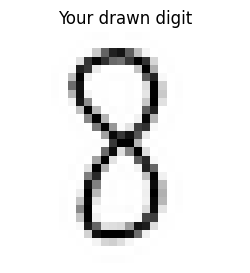

Predicted digit: 8


np.int64(8)

In [30]:
# This cell will run after you close the canvas
process_drawn_digit()